# Aufgabe 2: Data Exploration und Analyse

In [50]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math

In [51]:
# Datensatz einlesen
dataset = pd.read_csv('./DatenAusgegeben1.0.csv', delimiter=';', encoding = 'cp852')
dataset

,Grundstück in qm,Grundstücksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,...,Schlafzimmer,Küchen,Küchenqualitt,Rume,Garage Typ,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,...,6,2,3,10,Anbau,2,NaN,8,2136,156500
1,1326,Reg,Nein,North East,RL,Norm,1Fam,5,2133,2133,...,3,1,4,7,Anbau,3,NaN,1,2137,350000
2,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,...,3,1,4,5,Freistehend,1,NaN,6,2140,137900
3,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,...,3,1,4,8,Anbau,2,NaN,4,2136,184000
4,697,Reg,Nein,Miller,RL,Norm,1Fam,5,2129,2129,...,3,1,4,7,Anbau,2,NaN,6,2140,189000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1272,IR1,Nein,North East,RL,Norm,1Fam,5,2133,2134,...,3,1,5,10,Eingebaut,3,NaN,3,2138,412500
1996,941,IR1,Nein,Miller,RL,Norm,1Fam,5,2134,2134,...,3,1,4,7,Anbau,2,NaN,7,2139,195500
1997,1093,Reg,Nein,Grand Park,RL,Norm,1Fam,7,2040,2130,...,2,1,3,6,Freistehend,1,NaN,5,2137,112000
1998,1228,IR1,Nein,North East,RL,Norm,1Fam,5,2134,2134,...,3,1,4,9,Eingebaut,3,NaN,2,2136,279000


Import seaborn und pyplot

In [52]:
columns = ['Grundstück in qm', 'Zustand', 'Gebaut',
           'Renoviert', 'Zustand Fassade', 'Kellerflche in qm',
           'Erster Stock in qm', 'Zweiter Stock in qm', 'Wohnflche in qm', 
           'Schlafzimmer', 'Küchen', 'Küchenqualitt', 'Rume', 'Garagenkapazitt',
           'Verkaufsmonat', 'Verkaufsjahr', 'Preis']

## Finden von Anomalien
Zuerst müssen Ausreißer im Datensatz gefunden werden. Hierfür eignen sich Boxplots sehr gut.

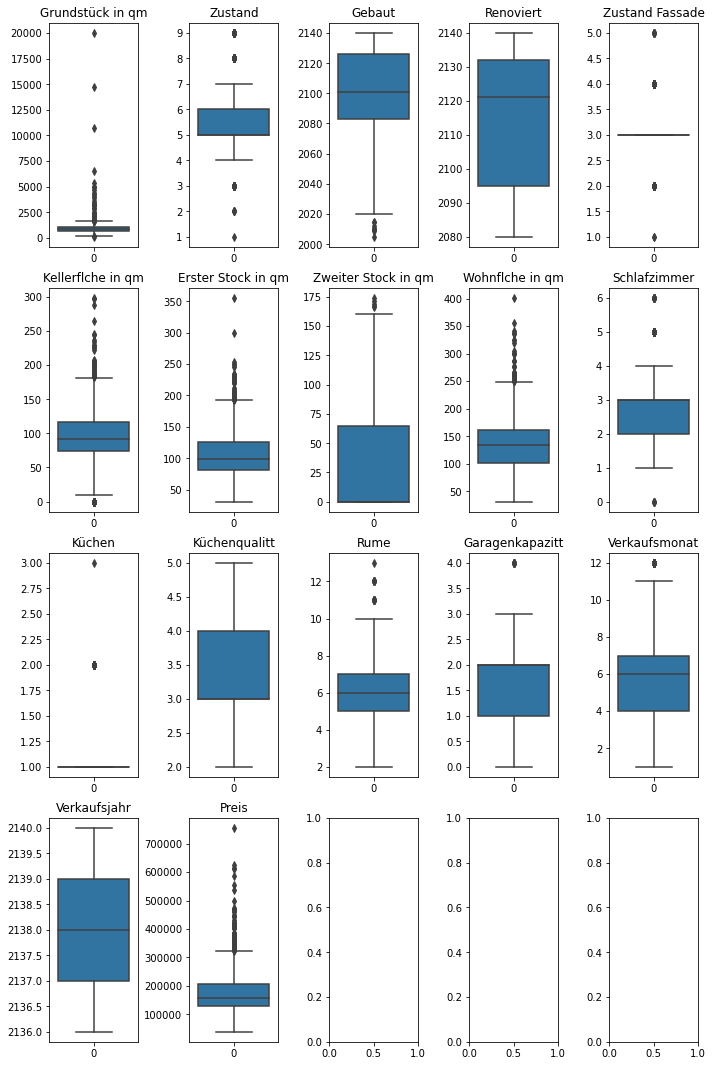

In [53]:
## Durch Subplots mehrere Plots auf einer Figure
fig, axes = plt.subplots(4, 5, figsize = (10, 15))
i = 0
plt.tight_layout(pad = 2)
for column in columns:
  chosenax = axes[math.floor(i / 5)][i % 5]
  chosenax.set_title(column)
  sb.boxplot(data = dataset[column], ax = chosenax)
  i = i + 1
plt.show()

Bei dem obenstehenden Diagramm zeigt sich, dass sich in einigen Spalten durchaus starke Ausreißer finden.  
Hier ist als Beispiel die Grundstücksgröße, Wohnfläche und den Preis zu nennen. Diese Ausreißer sollten in der Data Preparation folglich bereinigt werden

## Untersuchung auf einen Zusammenhang zwischen Preis und Verkaufszeitpunkt
Um zu Untersuchen ob der Zeitpunkt einen Einfluss auf den Verkaufspreis besitzt, untersuchen wir zwei Boxplots die den Zusammenhang zwischen Verkaufszeitpunkt und Verkaufspreis darstellen sollen.

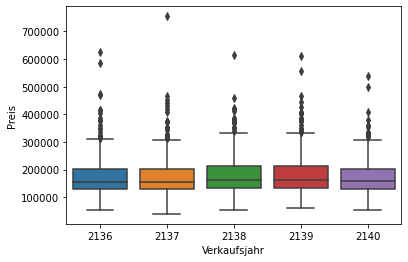

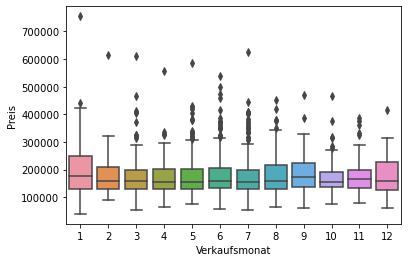

In [54]:
sb.boxplot(data = dataset[['Verkaufsjahr', 'Preis']], x = 'Verkaufsjahr', y = 'Preis')
plt.show()
sb.boxplot(data = dataset[['Verkaufsmonat', 'Preis']], x = 'Verkaufsmonat', y = 'Preis')
plt.show()

### Erkenntnis
Aus diesen zwei Diagrammen lässt sich kein Zusammenhang zwischen Zeitpunkt und Preis erkennen. Verkaufsjahr und Verkaufsmonat besitzen keinen Einfluss auf den Preis.

## Untersuchung des Datensatzes auf vernachlässigbare Hauseigenschaften (Spalten)

Da nicht-aussagekräftige Spalten nicht in unser Modell einfließen sollten, wird folgend der Datensatz auf vernachlässigbare bzw. nichtssagende Eigenschaften untersucht.

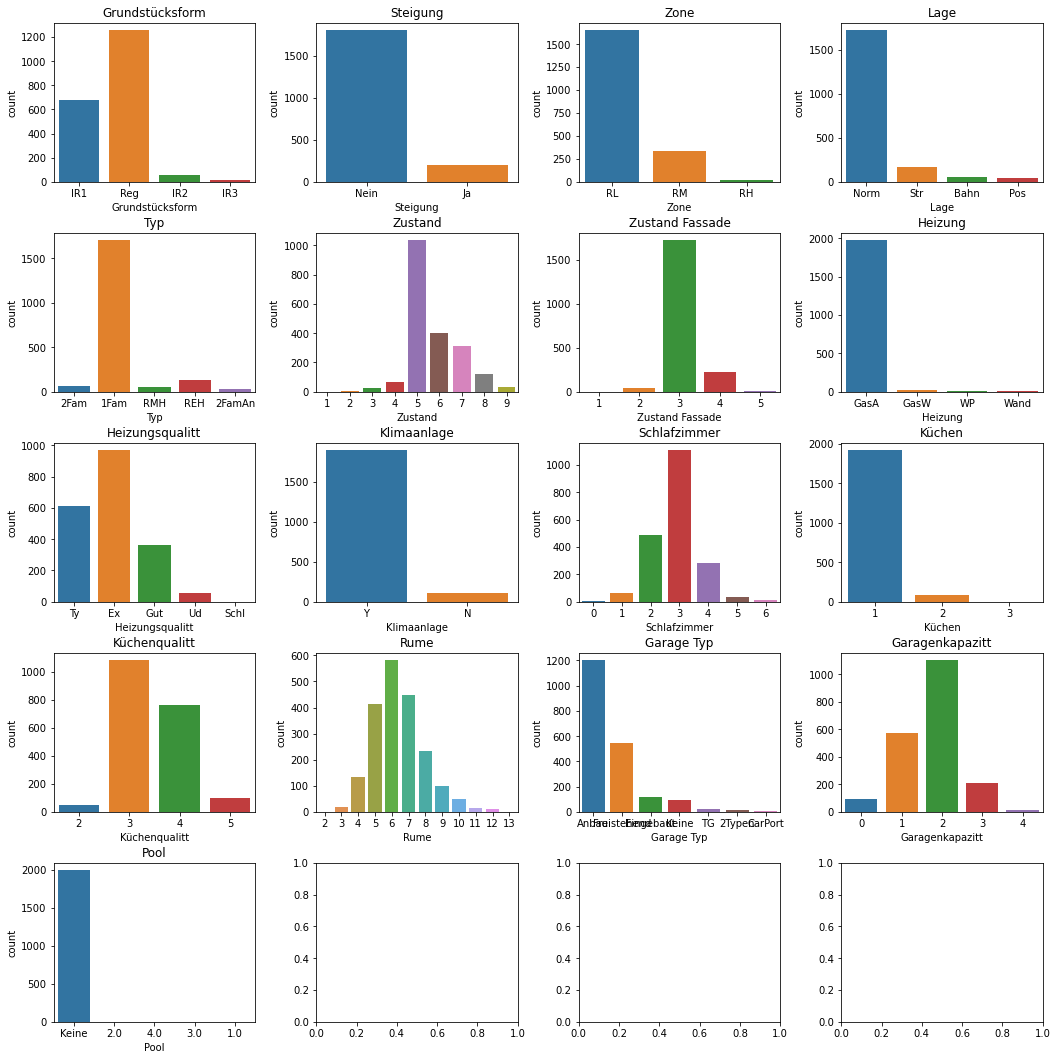

In [55]:
attribute_columns = ['Grundstücksform', 'Steigung', 'Zone', 'Lage',
'Typ', 'Zustand', 'Zustand Fassade', 'Heizung',
'Heizungsqualitt', 'Klimaanlage', 'Schlafzimmer', 'Küchen',
'Küchenqualitt', 'Rume', 'Garage Typ', 'Garagenkapazitt', 'Pool'] # Alle Spalten die Immobilieneigenschaften repräsentieren

data_no_nan = dataset[attribute_columns].fillna('Keine') # Füllt leere Zeilen (bspw. bei Pool und GaragenTyp) mit einem Standardwert.

column_amount = len(data_no_nan.columns)
fig, axes = plt.subplots(math.ceil(column_amount / 4), 4, figsize = (15, 15))

i = 0
plt.tight_layout(pad = 3)
for column in data_no_nan.columns:
  chosenax = axes[math.floor(i / 4)][i % 4]
  chosenax.set_title(column)
  sb.countplot(data = data_no_nan, x = column, ax = chosenax)
  i = i + 1
plt.show()


### Erkenntnis
Hier hat sich herausgestellt, dass einige Spalten nicht aussagekräftig genug sind, da die Spalten eine zu geringe Varianz besitzen.

Spalten mit sehr geringer Varianz:
- Pool
- Küchen(anzahl)
- Klimaanlage
- Heizung



## Korrelation zwischen Preis und Immmobilieneigenschaften
Um die Korrelation visualisieren zu können wird folgend eine einspaltige Heatmap genutzt.  
Aus dieser soll sich herauslesen lassen können welche Attribute ausschlaggebend für einen höheren, oder auch einen niedrigeren Preis sind.

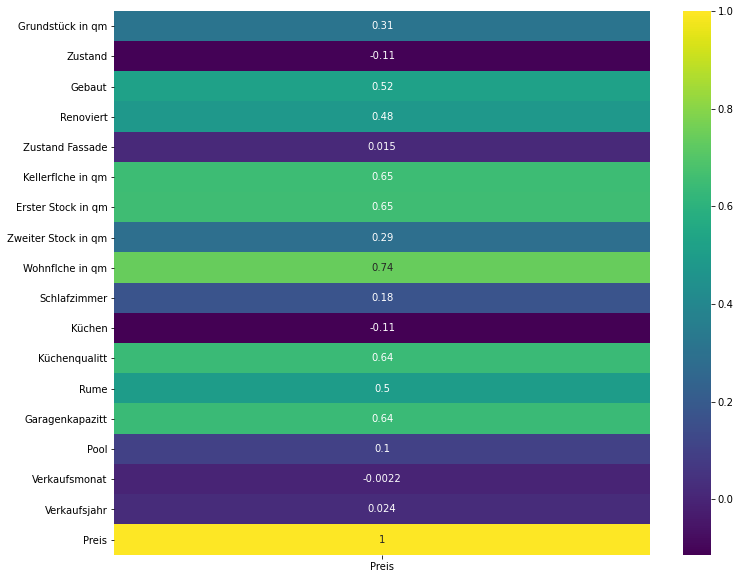

In [56]:
# Ordinale Daten
plt.figure(figsize = (12, 10))
sb.heatmap(data = dataset.fillna(0).corr()['Preis'].to_frame(), annot = True, cmap = 'viridis')
plt.show()

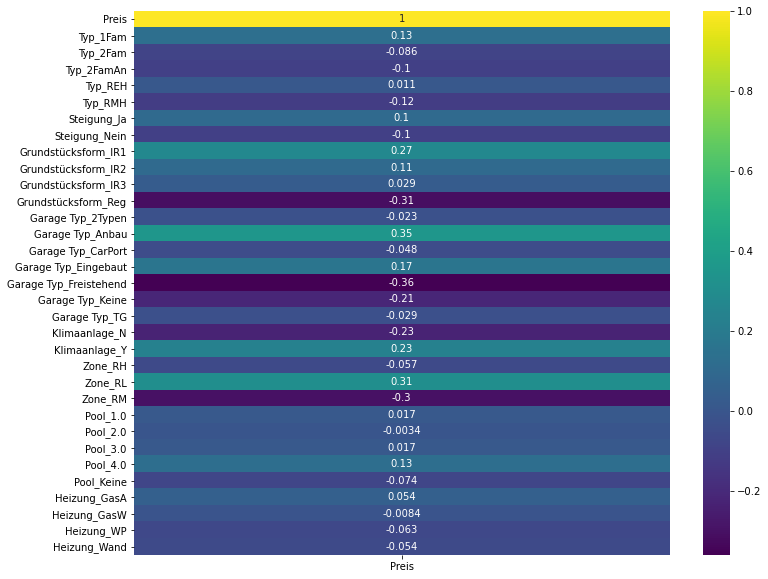

In [57]:
# Kategoriale Daten
encoded_kategorieeigenschaften = pd.get_dummies(dataset[['Typ', 'Steigung', 'Grundstücksform', 'Garage Typ', 'Klimaanlage', 'Zone', 'Pool', 'Heizung']].fillna('Keine'))

bezirk_preis = dataset[['Preis']].join(encoded_kategorieeigenschaften)
plt.figure(figsize = (12, 10))
sb.heatmap(data = bezirk_preis.corr()['Preis'].to_frame(), annot = True, cmap = 'viridis')
plt.show()

### Erkenntnis
In einer Korrelation mit dem Preis stehende Eigenschaften sind:
- Grundstücksgröße
- Baujahr
- Renovierungsjahr
- Wohnfläche (1. Stock + 2. Stock)
- Kellerfläche
- Küchenqualität
- Räume
- Garagenkapazität

Unter den Kategorialen Daten stehen mit dem Preis in Korrelation:
- Typ
- Grundstücksform
- Garagentyp

Trotz Korrelation aufgrund mangelnder Aussagekraft nicht beachtete Kategoriale Daten:
- Klimaanlage
- Verkaufsmonat
- Verkaufsjahr

## In welchem Preisumfeld liegt welcher Bezirk?
Um den Investoren eine Empfehlung zu geben mit welchem Budget sie in welchen Bezirk investieren sollten (Beantwortung des Ziels 3), sollen die Quartile der Hauspreise je Bezirk betrachtet werden.

Ebenso soll betrachtet werden ob die Auswahl eines einzelnen Bezirks im Vergleich zu allen anderen Bezirken eine Auswirkung auf den Verkaufspreis einer Immobilie besitzt.

Der Bezirk `Somerst` soll durch `Somerset` ersetzt werden, da es sich hier höchstwahrscheinlich um einen Rechtschreibfehler handelt.  
Zudem wird in den Berechnungen der Bezirk `Finger River` nicht berücksichtigt, da in dem Datensatz keine Immobilie dieses Bezirks vorhanden ist. Daher lässt sich auch keine Aussage zu diesem Bezirk treffen.

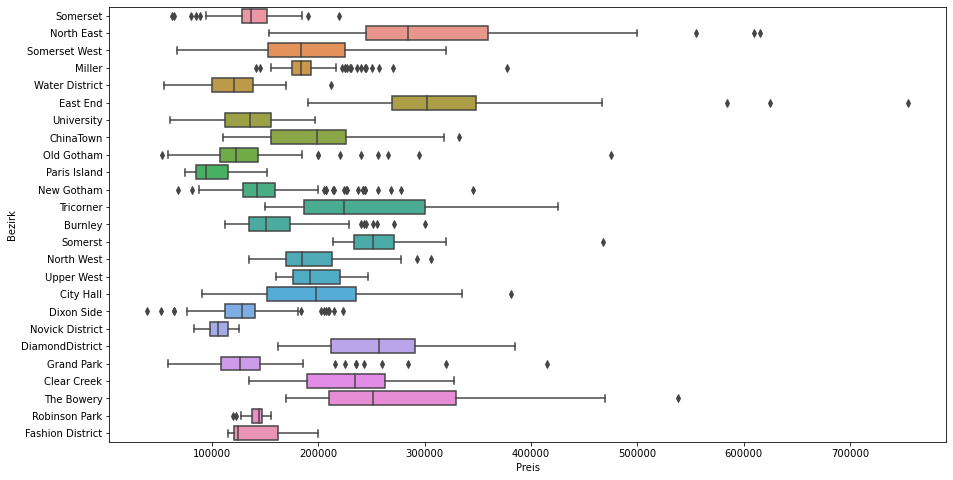

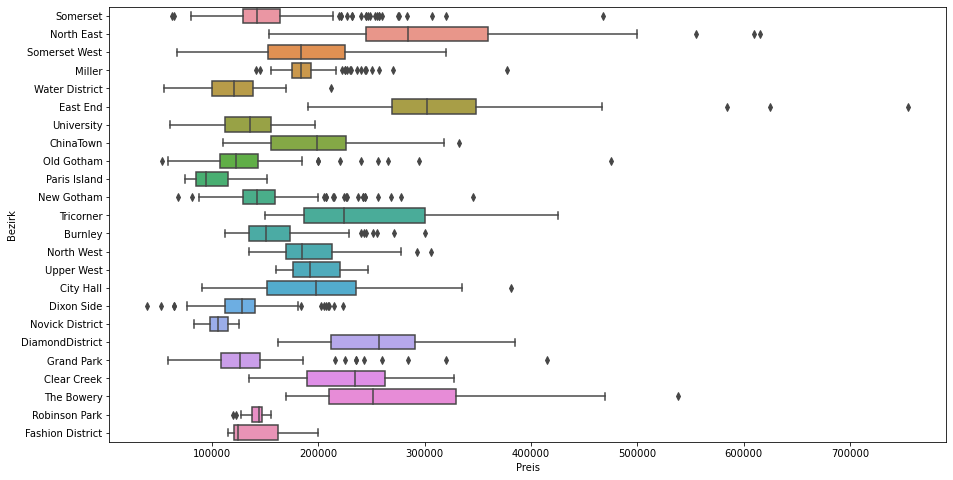

In [61]:
dataset['Bezirk'] = dataset['Bezirk'].replace('Somerst', 'Somerset')

plt.figure(figsize = (15,8))
sb.boxplot(data = dataset, x = 'Preis', y = 'Bezirk')
plt.show()

In [59]:
pd.get_dummies(dataset['Bezirk']).replace(0, math.nan).mul(dataset['Preis'], axis = 0).quantile([.25,.5,.75])

,Burnley,ChinaTown,City Hall,Clear Creek,DiamondDistrict,Dixon Side,East End,Fashion District,Grand Park,Miller,...,Paris Island,Robinson Park,Somerset,Somerset West,Somerst,The Bowery,Tricorner,University,Upper West,Water District
0.25,134750.0,155900.0,151250.0,189375.0,211625.0,112250.0,269342.5,121000.0,108000.0,174750.0,...,85000.0,137800.0,128500.0,153000.0,234000.0,209750.0,186625.00,112000.0,175900.0,100000.0
0.50,150900.0,198500.0,198000.0,234250.0,257500.0,128000.0,301750.0,124000.0,126300.0,183750.0,...,93900.0,143875.0,137000.0,184000.0,251000.0,251000.0,224000.00,135900.0,192500.0,120500.0
0.75,173000.0,226001.0,235250.0,262500.0,291000.0,140525.0,348500.0,162500.0,145125.0,193375.0,...,115000.0,147000.0,152000.0,225000.0,271250.0,329500.0,300313.25,155000.0,219990.0,139000.0


### Erkenntnis
Als Orientierung für das Budget der Investierenden kann die oben gezeigte Tabelle zu Rate gezogen werden.  
Das 0.25 Quartil sollte als Mindest-Budget und das 0.75 Quartil als obere Budgetgrenze gelten.

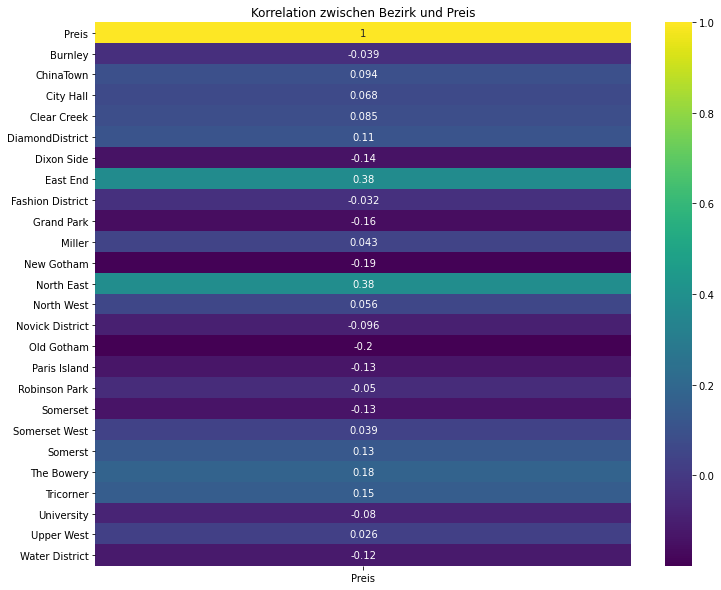

In [60]:
encoded_bezirke = pd.get_dummies(dataset['Bezirk'])
bezirk_preis = dataset[['Preis']].join(encoded_bezirke)
plt.figure(figsize = (12, 10))
sb.heatmap(data = bezirk_preis.corr()['Preis'].to_frame(), annot = True, cmap = 'viridis').set_title('Korrelation zwischen Bezirk und Preis')
plt.show()

### Erkenntnis
Durch diese Heatmap lässt sich erkennen, wie die Auswahl eines Bezirkes eine Auswirkung auf den Preis einer Immobilie hat.  
Beispielsweise besitzen die Bezirke 'North East' und 'East End' mit einem Korrelationswert von +0,38 einen hohen positiven Einfluss auf dem Preis, d.h. Immobilien dort sind teurer als Beispielsweise in dem Bezirk 'Old Gotham' mit einem Korrelationswert von -0,2.